In [2]:
'''
Author: RyanWan
First edition: 2020/3
Last modified: 2020/3/6
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.cm import ScalarMappable
%matplotlib inline

In [3]:
df = pd.read_csv('true_car_listings.csv')
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,tX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,Ny,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [9]:
states = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona',
        'CA': 'California','CO': 'Colorado','CT': 'Connecticut',
        'DC': 'District of Columbia','DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia','GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa','ID': 'Idaho','IL': 'Illinois','IN': 'Indiana',
        'KS': 'Kansas','KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan','MN': 'Minnesota','MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi','MT': 'Montana',
        'NA': 'National','NC': 'North Carolina','ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire','NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York',
        'OH': 'Ohio','OK': 'Oklahoma','OR': 'Oregon',
        'PA': 'Pennsylvania','PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina','SD': 'South Dakota',
        'TN': 'Tennessee','TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia','VI': 'Virgin Islands','VT': 'Vermont',
        'WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'
}

In [10]:
df['State'] = df['State'].str.upper()
df['State'] = df['State'].str.strip()

In [11]:
group_state= df.groupby('State')
counts =pd.DataFrame(group_state.count()) #Get counts of total cars
average =pd.DataFrame(group_state.mean()) #Get average data(price, mileage)
df2 =pd.DataFrame(data = [counts['Model'],average['Price'],average['Mileage']]).T #T = Transpose
df2.columns = ['Count','Price_Avg','Mileage_Avg']
df2 = df2.rename(index=states)

In [22]:
car_count = df2['Count'].to_dict()
price = df2['Price_Avg'].to_dict()
Mileage = df2['Mileage_Avg'].to_dict()

In [34]:
def create_map(data, title = ''):
    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    ax = plt.gca() 
    fig = plt.gcf()
    shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
    colors={}
    statenames=[]
    cmap = plt.cm.jet #地圖色調
    vmin = min(data.values()); vmax = max(data.values())#將數據標準化為0~1區間
    norm = Normalize(vmin=vmin, vmax=vmax)
    mapper = ScalarMappable(norm=norm, cmap=cmap)
    nodata_color = 'black'

    for shapedict in m.states_info:
        
        statename = shapedict['NAME']
        if statename in data:
            data_statename = data[statename]
            colors[statename] = mapper.to_rgba(data_statename)
            statenames.append(statename)
        else:
            statenames.append(statename)
            colors[statename] = nodata_color

    for nshape,seg in enumerate(m.states):
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        if (colors[statenames[nshape]] == nodata_color):
            p_no = poly
        ax.add_patch(poly)
    plt.title(title)

    #bounds = [0, 20000, 40000, 80000, 100000]

    cax = fig.add_axes([0.16, 0.05, 0.7, 0.05]) # x-pos, y-pos, bar-length(x-dir), bar-height(y-dir)
    cb = ColorbarBase(cax,cmap=cmap,norm=norm, orientation='horizontal')
    cb.set_label('Data Source: https://www.kaggle.com/jpayne/852k-used-car-listings')
    plt.show()

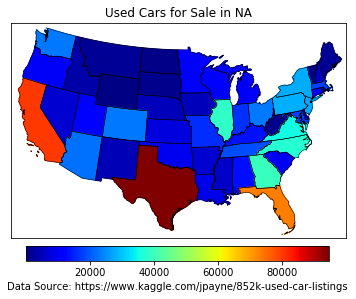

In [25]:
create_map(car_count, title='Used Cars for Sale in NA')

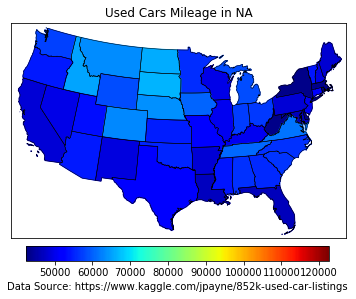

In [35]:
create_map(Mileage, title='Used Cars Mileage in NA')

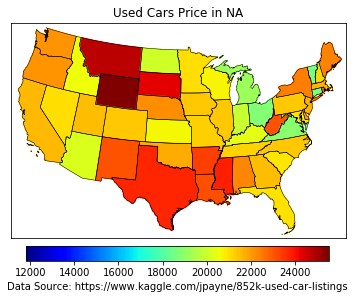

In [27]:
create_map(price, title='Used Cars Price in NA')